In [177]:
import pandas as pd
import matplotlib.pyplot as plt
address = 'HAM10000_metadata.csv'
df = pd.read_csv(address)
df


lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [178]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

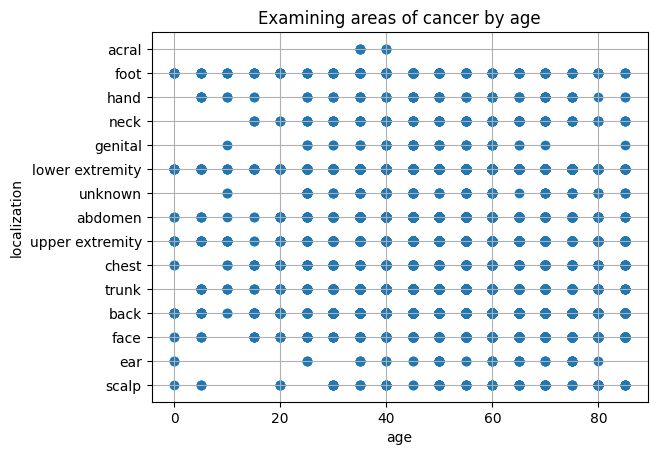

In [179]:
plt.title('Examining areas of cancer by age')
plt.scatter(df['age'],df['localization'])
plt.ylabel('localization')
plt.xlabel('age')
plt.grid()
plt.show()

In [180]:
plt.grid()
plt.scatter(df['sex'],df['localization'])
plt.ylabel('localization')
plt.xlabel('sex')
plt.show()

In [181]:
com_counts = df['localization'].value_counts()

# Calculate percentages
total_male_cases = com_counts.sum()
percentages = (com_counts / total_male_cases) * 100

# Plotting

plt.barh(com_counts.index, percentages, color='skyblue')
plt.title('The percentage of men who have so far all types of cancer from different areas')
plt.grid(color='red', linestyle='-.', linewidth=0.8, alpha=0.2)
for i, percent in enumerate(percentages):
    plt.text(percent, i, f'{percent:.2f}%', ha='left', va='center')
plt.xlabel('Percentages')
plt.ylabel('Localization')
plt.savefig('perslocman.png')
plt.show()

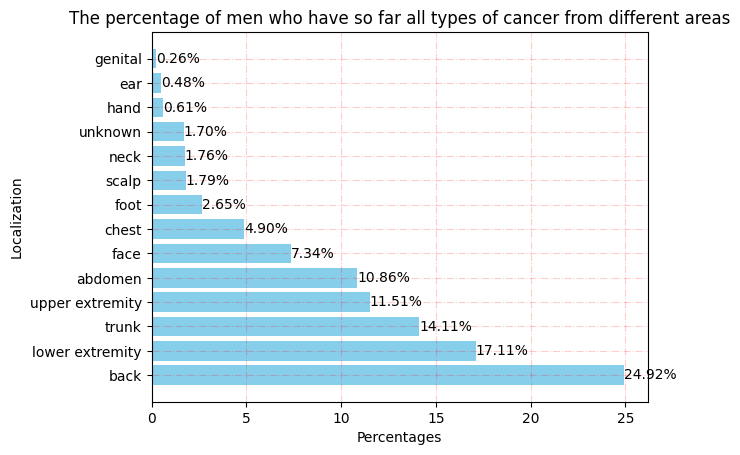

In [182]:
male_counts = df[df['sex'] == 'male']['localization'].value_counts()

# Calculate percentages
total_male_cases = male_counts.sum()
percentages = (male_counts / total_male_cases) * 100

# Plotting

plt.barh(male_counts.index, percentages, color='skyblue')
plt.title('The percentage of men who have so far all types of cancer from different areas')
plt.grid(color='red', linestyle='-.', linewidth=0.8, alpha=0.2)
for i, percent in enumerate(percentages):
    plt.text(percent, i, f'{percent:.2f}%', ha='left', va='center')
plt.xlabel('Percentages')
plt.ylabel('Localization')
plt.savefig('perslocman.png')
plt.show()

In [183]:
df['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

In [184]:
dx_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['diagnosis'] = df['dx'].map(dx_dict.get)

In [185]:
df['diagnosis'].value_counts()

diagnosis
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [186]:
df['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [187]:
df['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

In [188]:
df['age'].value_counts()

age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: count, dtype: int64

In [189]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Car_impute = imputer.fit(df[['age']])
df['age'] = Car_impute.transform(df[['age']]).ravel()
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
diagnosis       0
dtype: int64

In [190]:
imputer = SimpleImputer(missing_values= np.nan,strategy='mean')
Car_impute = imputer.fit(df[['age']])
df['age'] = Car_impute.transform(df[['age']]).ravel()

In [191]:
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
diagnosis       0
dtype: int64

In [192]:
def plot_dx(value):

    value_counts = value.value_counts()
    keys = value_counts.index
    counts = value_counts.values

    plt.figure(figsize=(10, 6))
    plt.bar(keys, counts, color='purple')

    plt.xlabel('Number of Rooms')
    plt.ylabel('Count')
    plt.title(f'Count of Rooms in dx columns')

    for i in range(len(keys)):
        plt.text(keys[i], counts[i] + 1, str(counts[i]), ha='center', va='bottom')

    plt.show()

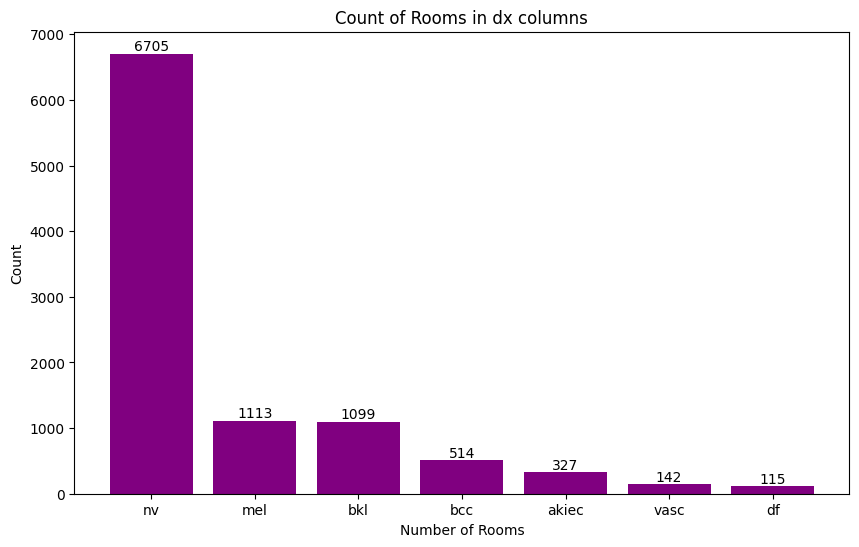

In [193]:
plot_dx(df['dx'])

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

df['diagnosis'].value_counts().plot(kind='bar', color='purple')

<Axes: xlabel='diagnosis'>

In [195]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1 = df.copy()

In [196]:
lesion_id_cat = label_encoder.fit_transform(df1['lesion_id'])
lesion_id_cat = pd.DataFrame({'lesion_id_cat': lesion_id_cat})

In [197]:
image_id_cat = label_encoder.fit_transform(df1['image_id'])
image_id_cat = pd.DataFrame({'image_id_cat': image_id_cat})

In [198]:
dx_cat = label_encoder.fit_transform(df1['dx'])
dx_cat = pd.DataFrame({'dx_cat': dx_cat})

In [199]:
dx_type_cat = label_encoder.fit_transform(df1['dx_type'])
dx_type_cat = pd.DataFrame({'dx_type_cat': dx_type_cat})

In [200]:
sex_cat = label_encoder.fit_transform(df1['sex'])
sex_cat = pd.DataFrame({'sex_cat': sex_cat})

In [201]:
localization_cat = label_encoder.fit_transform(df1['localization'])
localization_cat = pd.DataFrame({'localization_cat': localization_cat})

In [202]:
diagnosis_cat = label_encoder.fit_transform(df1['diagnosis'])
diagnosis_cat = pd.DataFrame({'diagnosis_cat': diagnosis_cat})

In [203]:
df1.lesion_id = lesion_id_cat
df1.image_id = image_id_cat
df1.dx = dx_cat
df1.dx_type = dx_type_cat
df1.sex = sex_cat
df1.localization = localization_cat
df1.diagnosis = diagnosis_cat

In [204]:
df1

lesion_id  image_id  dx  dx_type   age  sex  localization  diagnosis
0            118      3113   2        3  80.0    1            11          2
1            118       724   2        3  80.0    1            11          2
2           2710      2463   2        3  80.0    1            11          2
3           2710      1355   2        3  80.0    1            11          2
4           1460      7327   2        3  75.0    1             4          2
...          ...       ...  ..      ...   ...  ...           ...        ...
10010       2844      8778   0        3  40.0    1             0          0
10011       2844      9244   0        3  40.0    1             0          0
10012       2844      9230   0        3  40.0    1             0          0
10013        239      8548   0        3  80.0    1             5          0
10014       3487      7952   4        3  70.0    0             2          5

[10015 rows x 8 columns]

In [205]:
from sklearn.preprocessing import StandardScaler
scaled_features = df1.copy()

col_names = ['lesion_id', 'image_id' , 'dx', 'dx_type', 'age', 'sex', 'localization', 'diagnosis']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
scaled_features

lesion_id  image_id        dx   dx_type       age       sex  \
0      -1.680017 -0.655118 -1.496108  0.835507  1.662953  0.882321   
1      -1.680017 -1.481453 -1.496108  0.835507  1.662953  0.882321   
2      -0.474447 -0.879948 -1.496108  0.835507  1.662953  0.882321   
3      -0.474447 -1.263195 -1.496108  0.835507  1.662953  0.882321   
4      -1.055837  0.802468 -1.496108  0.835507  1.367434  0.882321   
...          ...       ...       ...       ...       ...       ...   
10010  -0.412122  1.304356 -2.867221  0.835507 -0.701196  0.882321   
10011  -0.412122  1.465542 -2.867221  0.835507 -0.701196  0.882321   
10012  -0.412122  1.460699 -2.867221  0.835507 -0.701196  0.882321   
10013  -1.623738  1.224801 -2.867221  0.835507  1.662953  0.882321   
10014  -0.113056  1.018650 -0.124995  0.835507  1.071915 -1.083518   

       localization  diagnosis  
0          0.847871  -1.343453  
1          0.847871  -1.343453  
2          0.847871  -1.343453  
3          0.847871  -1.343453  
4         -0.626664  -1.343453  
...             ...        ...  
10010     -1.469256  -2.997989  
10011     -1.469256  -2.997989  
10012     -1.469256  -2.997989  
10013     -0.416016  -2.997989  
10014     -1.047960   1.138350  

[10015 rows x 8 columns]

In [206]:
print(f"Length of X: {len(X)}")
print(f"Length of y_binary: {len(y_binary)}")


Length of X: 10015
Length of y_binary: 10015


In [207]:
y_binary = [1 if each == 'mel' else 0 for each in df['dx']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=1)

In [208]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)

train_accuracy = model_logistic.score(X_train, y_train)
test_accuracy = model_logistic.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8871692461308038
Testing Accuracy: 0.8876684972541188


In [209]:
y_pred_binary = model_logistic.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1781
           1       0.40      0.03      0.05       222

    accuracy                           0.89      2003
   macro avg       0.65      0.51      0.50      2003
weighted avg       0.84      0.89      0.84      2003



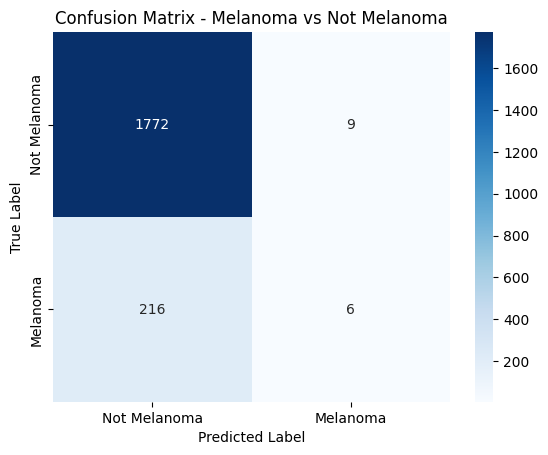

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_binary = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues',color='purple',
            xticklabels=['Not Melanoma', 'Melanoma'],
            yticklabels=['Not Melanoma', 'Melanoma'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Melanoma vs Not Melanoma')
plt.show()


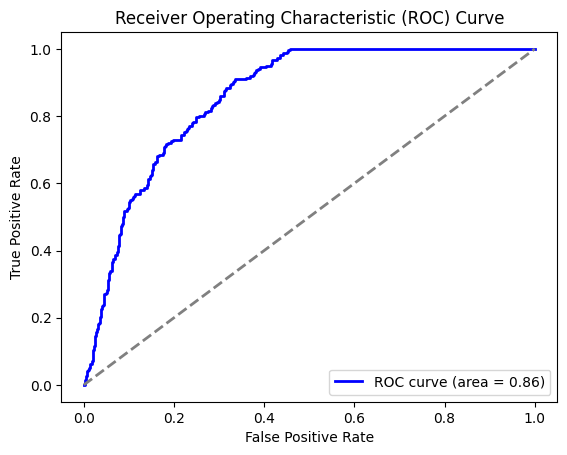

In [211]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


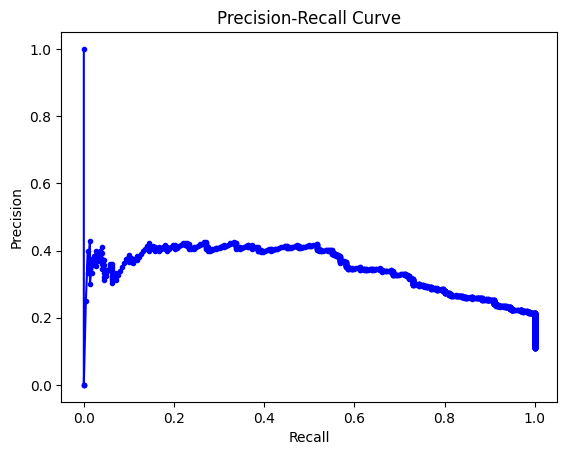

In [212]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model_logistic.predict_proba(X_test)[:, 1])

# Plot the Precision-Recall curve
plt.plot(recall, precision, marker='.', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


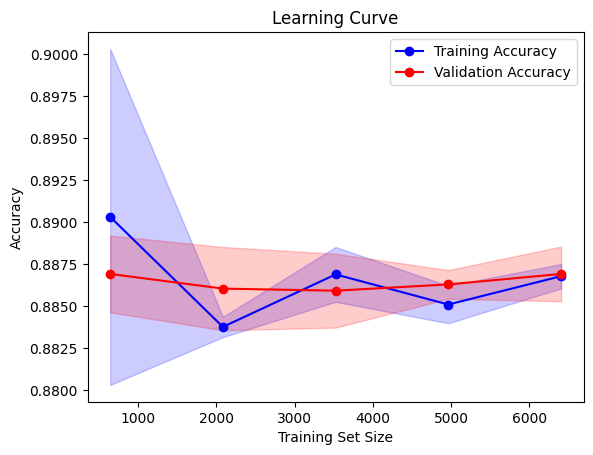

In [213]:
from sklearn.model_selection import learning_curve

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model_logistic, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and std deviation
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curve')
plt.show()


In [214]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_logistic, X, y_binary, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.83025462 0.88916625 0.888667   0.61907139 0.82675986]
Mean CV Accuracy: 0.81
